# <center><u>ST4035 - s15355 - Assignment1</u></center>

# a)

## <u> Python Librarys </u>

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## <u> Data preprocessing for train dataset </u>

## Loading Data Set

In [2]:
df = pd.read_csv('train.csv',engine='python')
df.head()

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2018,11,7,1,2,2,2,53,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,2018,1,7,1,2,2,1,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2018,5,7,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,2018,1,7,1,2,2,1,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,5,2016,8,7,1,2,1,1,99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


## Handling missing values in train dataset

In [3]:
df = df.drop('ID', axis=1)

In [4]:
df.replace(['99', 99], np.nan,  inplace=True)

In [5]:
df.isna().sum() 

Year                                              0
Month                                             0
Hospital                                          0
Sample                                            0
ICU                                              83
                                               ... 
FU_L.interrogansserovarAustralisstr.Ballico    1265
FU_L.interrogansserovarwolfiistr.3705          1265
FU_L.interrogansserovarWeerasinghe             1265
FU_Patoc                                       1265
Final                                             0
Length: 805, dtype: int64

In [6]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Year                                            0.000000
Month                                           0.000000
Hospital                                        0.000000
Sample                                          0.000000
ICU                                             5.984138
                                                 ...    
FU_L.interrogansserovarAustralisstr.Ballico    91.204037
FU_L.interrogansserovarwolfiistr.3705          91.204037
FU_L.interrogansserovarWeerasinghe             91.204037
FU_Patoc                                       91.204037
Final                                           0.000000
Length: 805, dtype: float64


In [7]:
print(missing_percentage[missing_percentage > 30])

Income                                         38.644557
Usualdrinkingwatersource                       69.646720
Usualbathingwatersource                        69.502523
Sourceofwaterforhousehold                      69.646720
Garbagedisposalprocedure                       69.718818
                                                 ...    
FU_L.interrogansserovarAlexistr.616            91.204037
FU_L.interrogansserovarAustralisstr.Ballico    91.204037
FU_L.interrogansserovarwolfiistr.3705          91.204037
FU_L.interrogansserovarWeerasinghe             91.204037
FU_Patoc                                       91.204037
Length: 762, dtype: float64


In [8]:
threshold = 30

In [9]:
cols_to_drop = missing_percentage[missing_percentage > threshold].index

In [10]:
df = df.drop(columns=cols_to_drop)

In [11]:
# print(f"Dropped columns: {cols_to_drop.tolist()}")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    1387 non-null   int64  
 1   Month                   1387 non-null   int64  
 2   Hospital                1387 non-null   int64  
 3   Sample                  1387 non-null   int64  
 4   ICU                     1304 non-null   float64
 5   OPD                     1304 non-null   float64
 6   Sex                     1242 non-null   float64
 7   Age                     1217 non-null   float64
 8   Ethnicity               1242 non-null   float64
 9   Education               1027 non-null   float64
 10  TertiaryEducation       1027 non-null   float64
 11  Prophylactics           1084 non-null   float64
 12  Pasttreatments          1088 non-null   float64
 13  Pastantibiotics         1086 non-null   float64
 14  Chronicillness          1068 non-null   

In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}")
    print("\n")

Column: Year
Unique values: [2018 2016 2017 2019]
Number of unique values: 4


Column: Month
Unique values: [11  1  5  8 12  6  7  9 10  2  3  4]
Number of unique values: 12


Column: Hospital
Unique values: [7 5 1 8 4 3 2 6]
Number of unique values: 8


Column: Sample
Unique values: [1 2]
Number of unique values: 2


Column: ICU
Unique values: [ 2. nan  1.]
Number of unique values: 3


Column: OPD
Unique values: [ 2.  1. nan]
Number of unique values: 3


Column: Sex
Unique values: [ 2.  1. nan]
Number of unique values: 3


Column: Age
Unique values: [53. 17. 47. 21. nan 64. 50. 59. 55. 65. 52. 26. 24. 40. 45. 35. 41. 30.
 33. 34. 20. 49. 63. 73. 60. 43. 38. 61. 39. 51. 14. 23. 54. 19. 57. 28.
 31. 22. 42. 68. 32. 37. 56. 25. 36. 46. 58. 27. 29. 48. 44. 75. 70. 69.
 71. 13. 62. 66. 15. 16. 18. 67. 76.  2. 72. 74.  5. 79.  6. 87.  8. 12.
 11. 80.  9. 85.]
Number of unique values: 76


Column: Ethnicity
Unique values: [ 1. nan  6.  3.  2.]
Number of unique values: 5


Column: Education
U

In [14]:
numerical_columns = ['Age']
categorical_columns = [col for col in df.columns if col not in numerical_columns]
categorical_columns

['Year',
 'Month',
 'Hospital',
 'Sample',
 'ICU',
 'OPD',
 'Sex',
 'Ethnicity',
 'Education',
 'TertiaryEducation',
 'Prophylactics',
 'Pasttreatments',
 'Pastantibiotics',
 'Chronicillness',
 'Possibleexposure',
 'Feveronset',
 'Headacheonset',
 'Musclepainonset',
 'Cnsuffusiononset',
 'Jaundiceonset',
 'Skinrashonset',
 'Oliguriaonset',
 'Anuriaonset',
 'SOBonset',
 'Coughonset',
 'Haemoptasisonset',
 'Chestpainonset',
 'Nauseaonset',
 'Vomitingonset',
 'Diarrhoeaonset',
 'Bleedingonset',
 'Mucosalrashonset',
 'Prostrationonset',
 'Rigorsonset',
 'Photophobiaonset',
 'Chillsonset',
 'Muscletendernessonset',
 'Psychoticsymptomsonset',
 'Confusiononset',
 'WPqPCRDiagnosis',
 'Isolate',
 'Final']

In [15]:
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [16]:
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [17]:
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [18]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Year                    1387 non-null   category
 1   Month                   1387 non-null   category
 2   Hospital                1387 non-null   category
 3   Sample                  1387 non-null   category
 4   ICU                     1387 non-null   category
 5   OPD                     1387 non-null   category
 6   Sex                     1387 non-null   category
 7   Age                     1387 non-null   float64 
 8   Ethnicity               1387 non-null   category
 9   Education               1387 non-null   category
 10  TertiaryEducation       1387 non-null   category
 11  Prophylactics           1387 non-null   category
 12  Pasttreatments          1387 non-null   category
 13  Pastantibiotics         1387 non-null   category
 14  Chronicillness          

## Checking the duplicates 

In [19]:
df.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
1382    False
1383    False
1384    False
1385    False
1386    False
Length: 1387, dtype: bool

In [20]:
df.duplicated().sum()

117

In [21]:
df=df.drop_duplicates()

In [22]:
df.duplicated().sum()

0

## <u> Descriptive analysis </u>

In [23]:
# Summary Statistics
df.info(all)

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1386
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Year                    1270 non-null   category
 1   Month                   1270 non-null   category
 2   Hospital                1270 non-null   category
 3   Sample                  1270 non-null   category
 4   ICU                     1270 non-null   category
 5   OPD                     1270 non-null   category
 6   Sex                     1270 non-null   category
 7   Age                     1270 non-null   float64 
 8   Ethnicity               1270 non-null   category
 9   Education               1270 non-null   category
 10  TertiaryEducation       1270 non-null   category
 11  Prophylactics           1270 non-null   category
 12  Pasttreatments          1270 non-null   category
 13  Pastantibiotics         1270 non-null   category
 14  Chronicillness          1270 

In [24]:
# Summary for the Continuous Variables
df[numerical_columns].describe()

,Age
count,1270.000000
mean,42.980581
std,14.521136
min,2.000000
25%,32.250000
50%,42.955629
75%,54.000000
max,87.000000


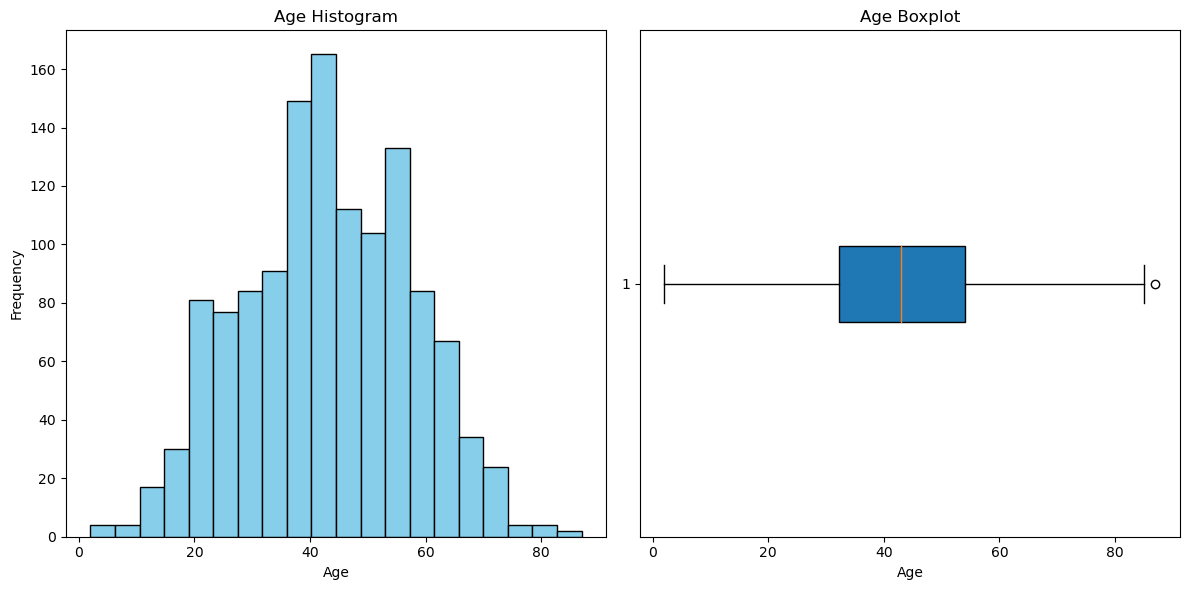

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram on the first subplot (left side)
ax1.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Age Histogram')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')

# Plot boxplot on the second subplot (right side)
ax2.boxplot(df['Age'], vert=False, patch_artist=True)
ax2.set_title('Age Boxplot')
ax2.set_xlabel('Age')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

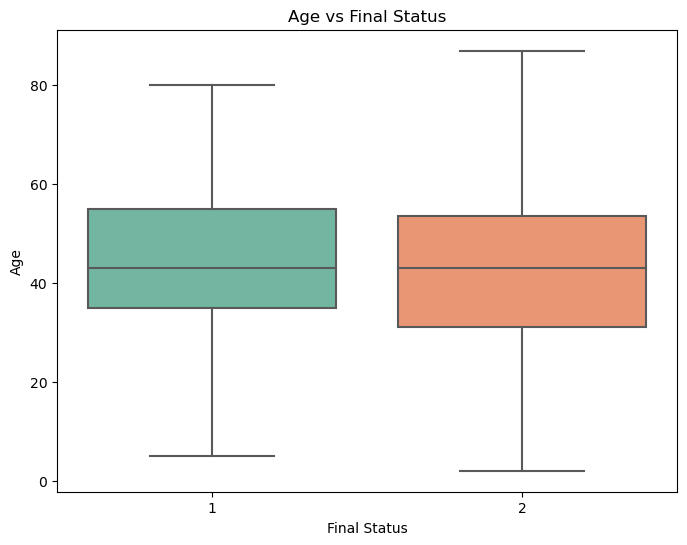

In [26]:
# Boxplot for numerical variables grouped by Final Status
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Final', y=col, data=df, palette='Set2')
    plt.title(col + " vs Final Status")
    plt.xlabel("Final Status")
    plt.ylabel(col)
    plt.show()

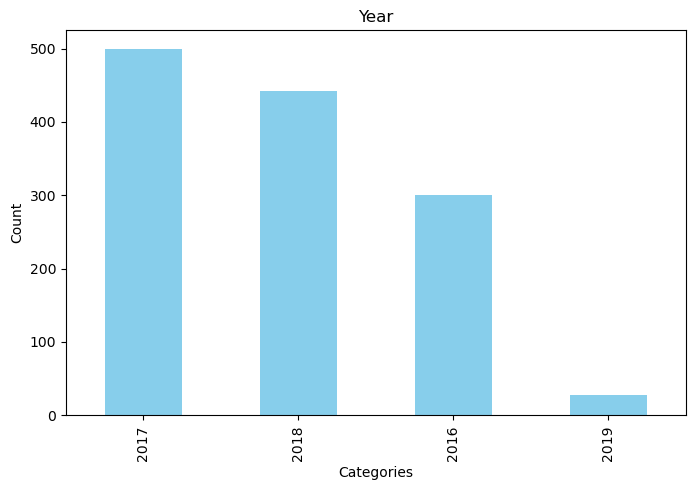

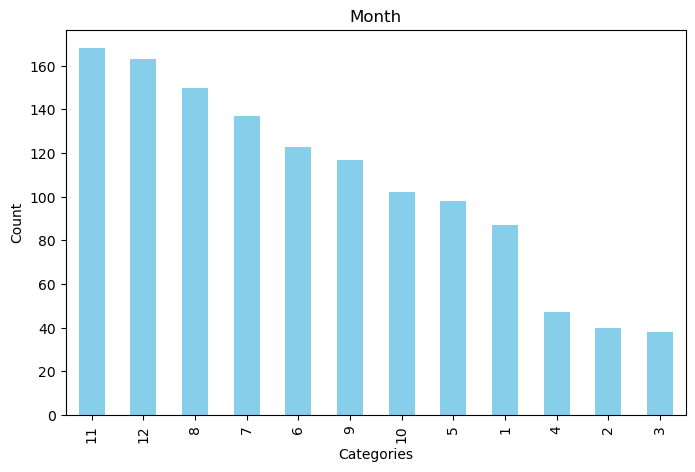

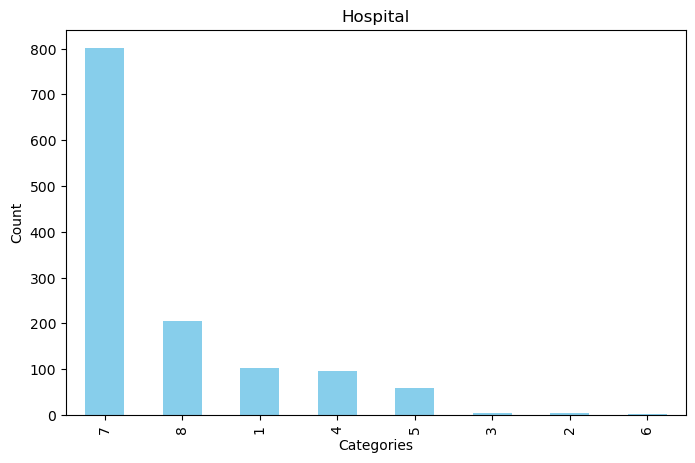

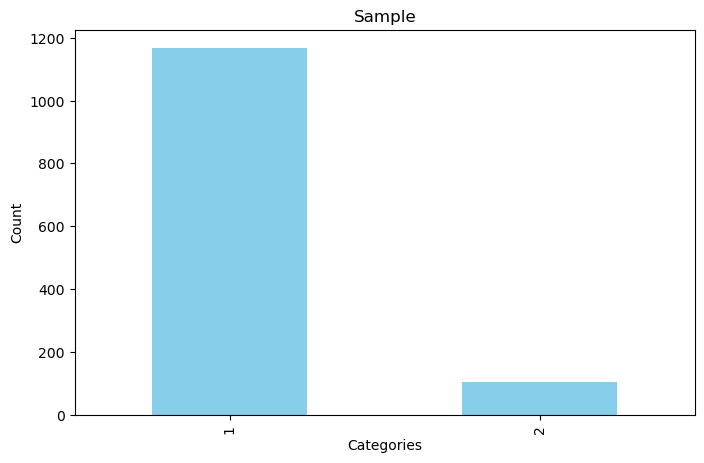

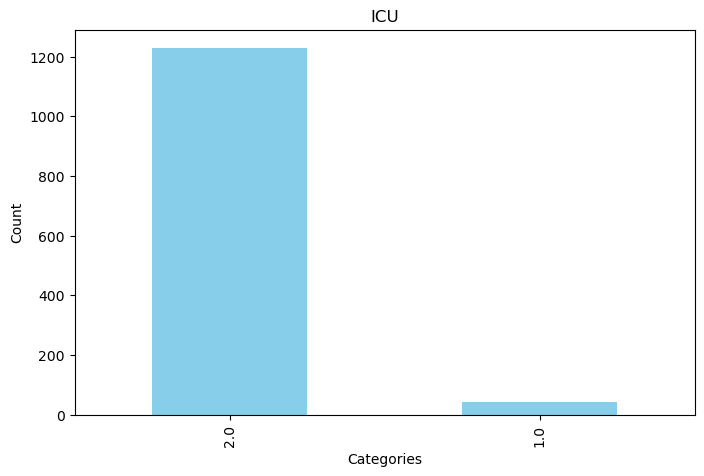

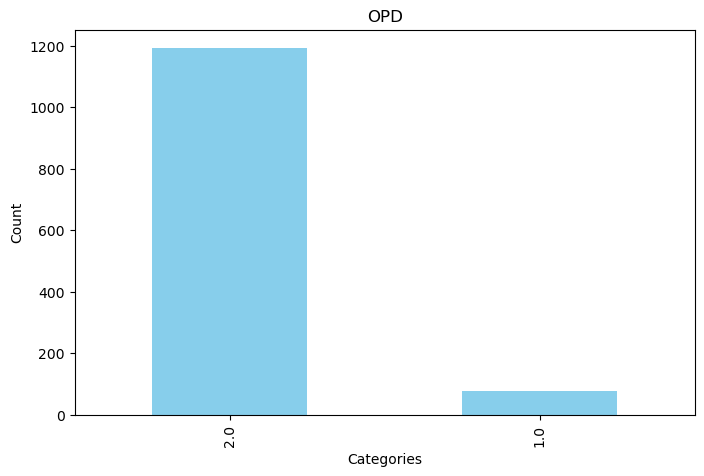

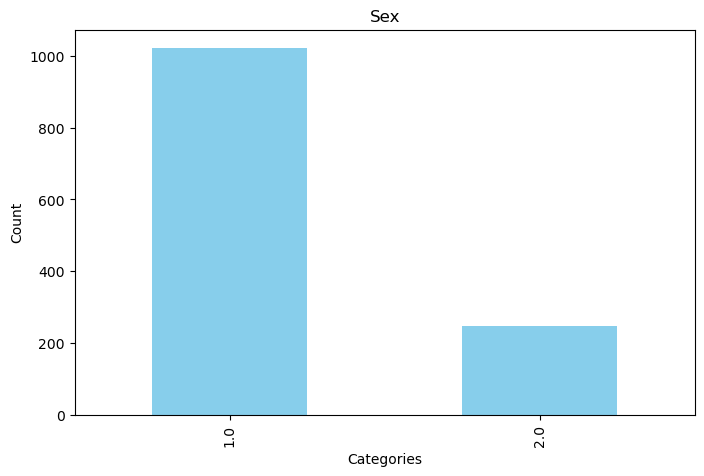

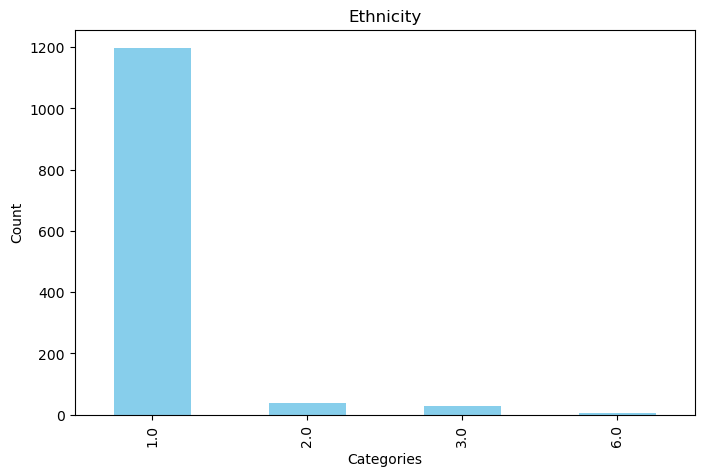

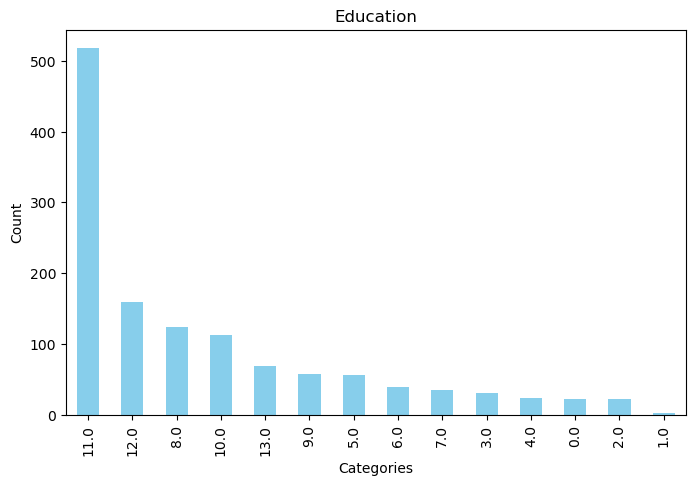

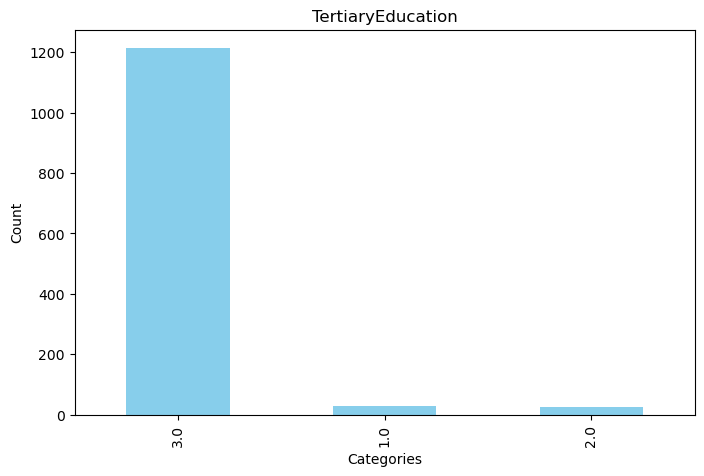

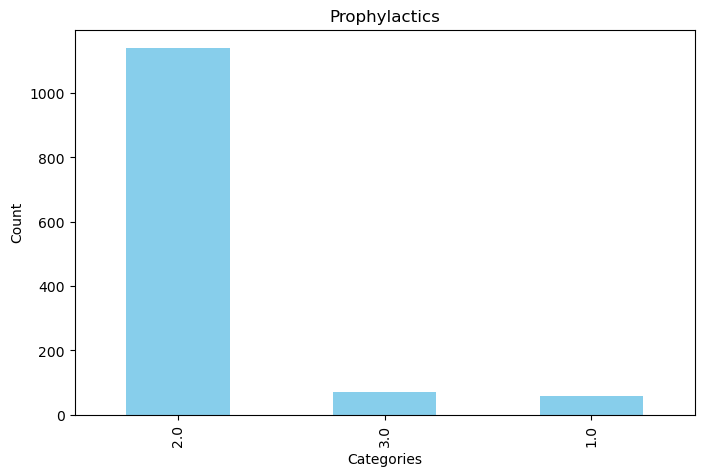

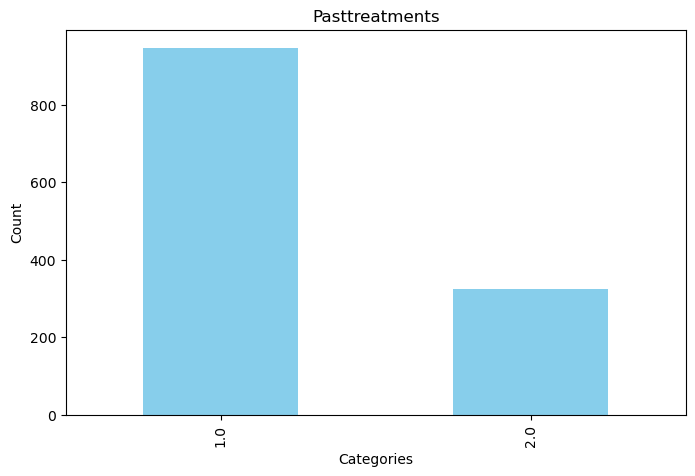

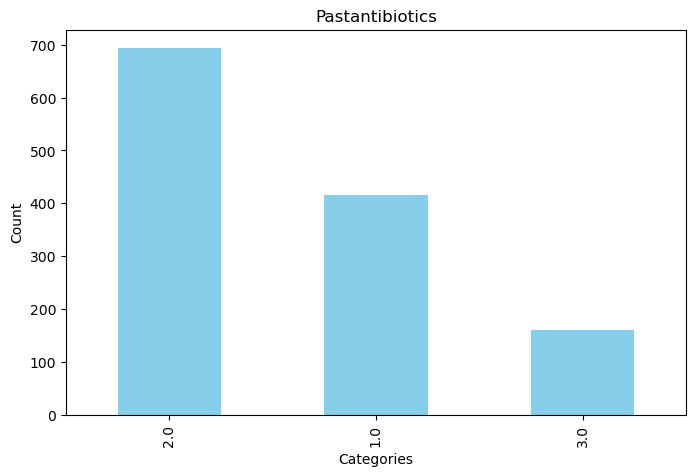

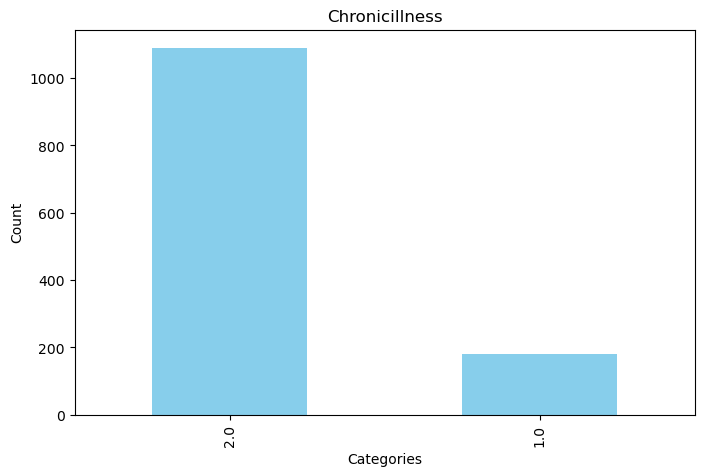

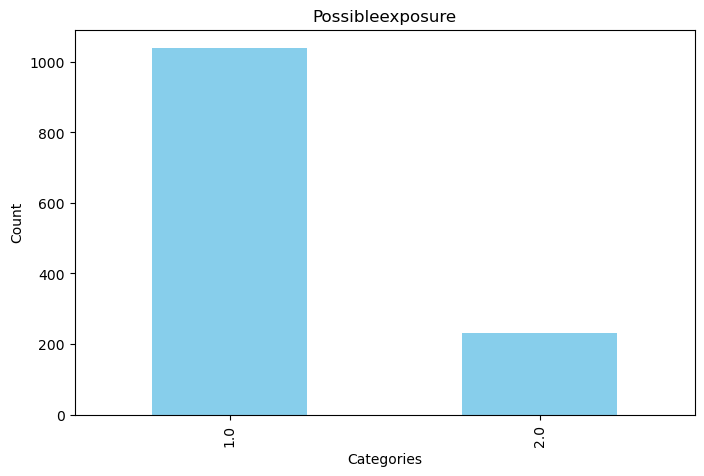

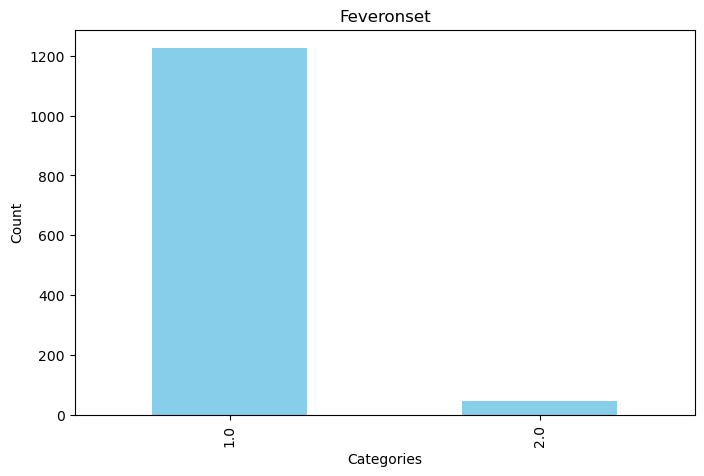

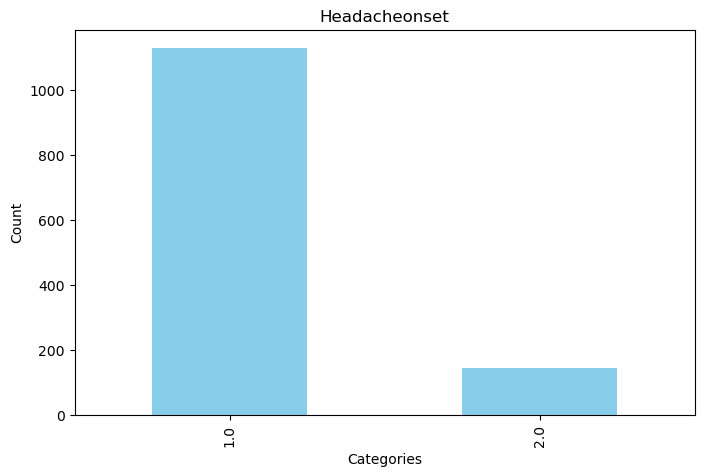

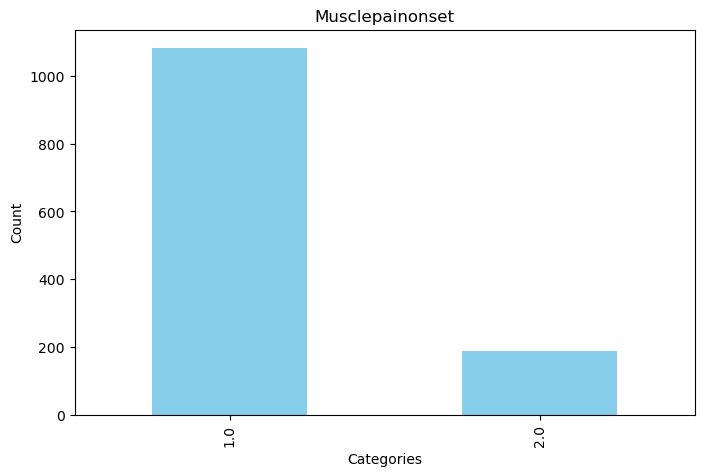

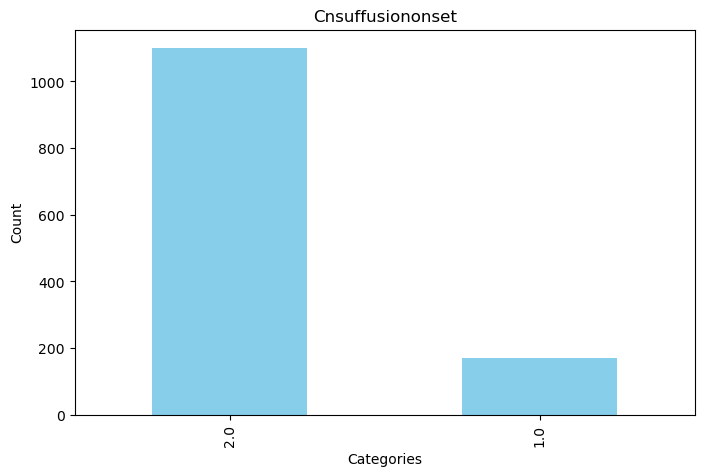

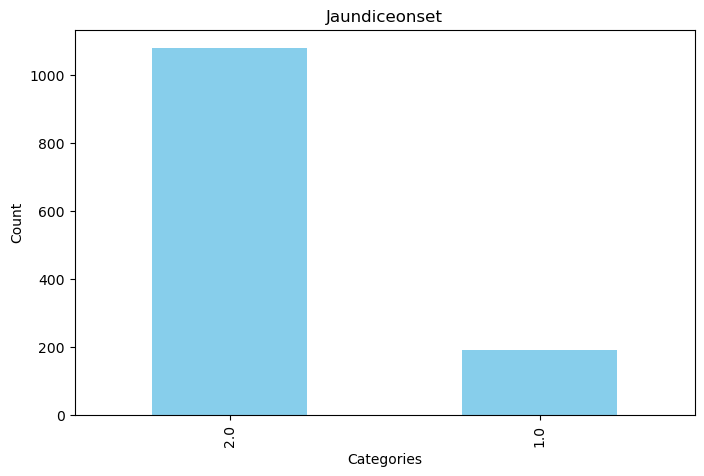

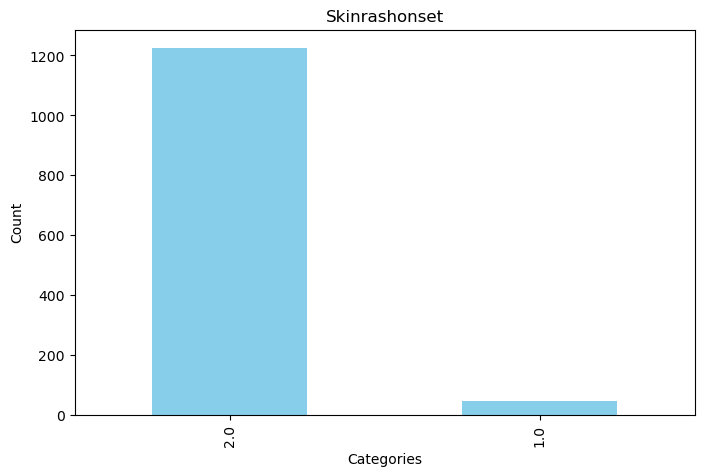

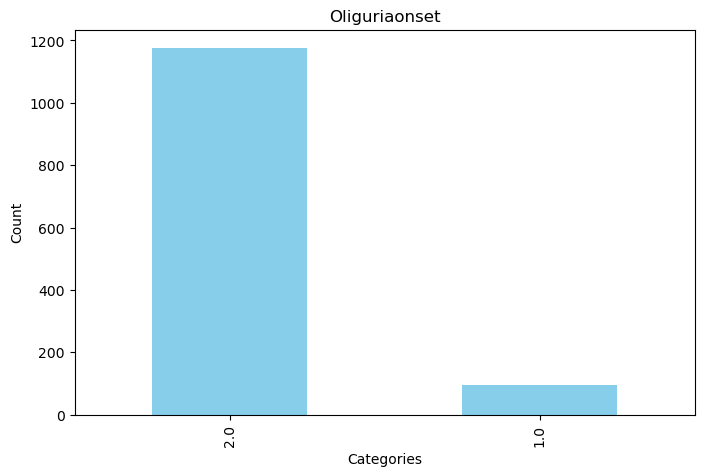

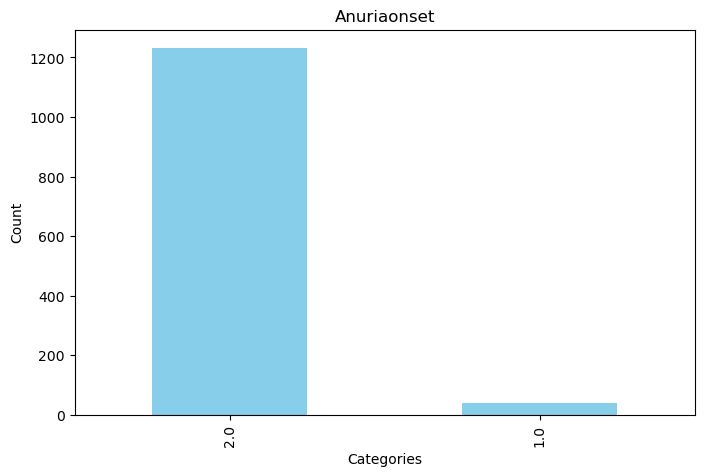

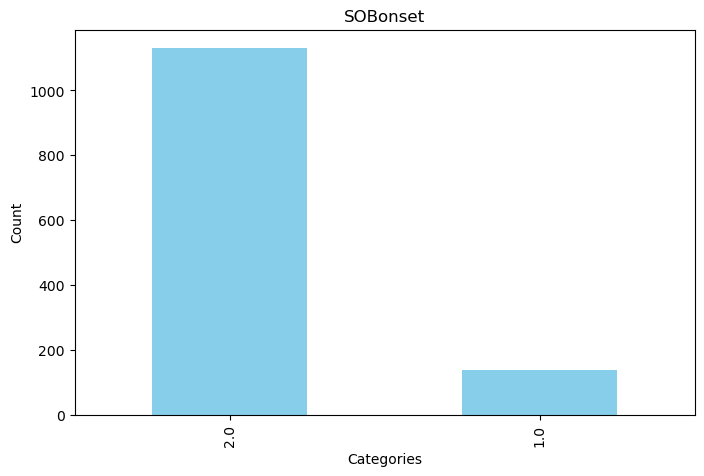

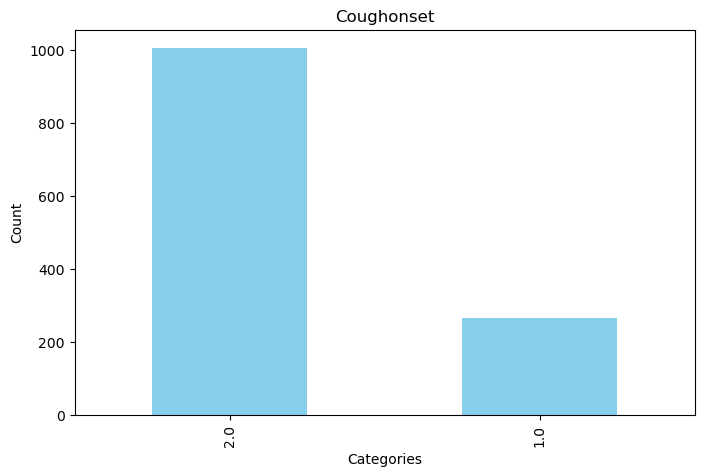

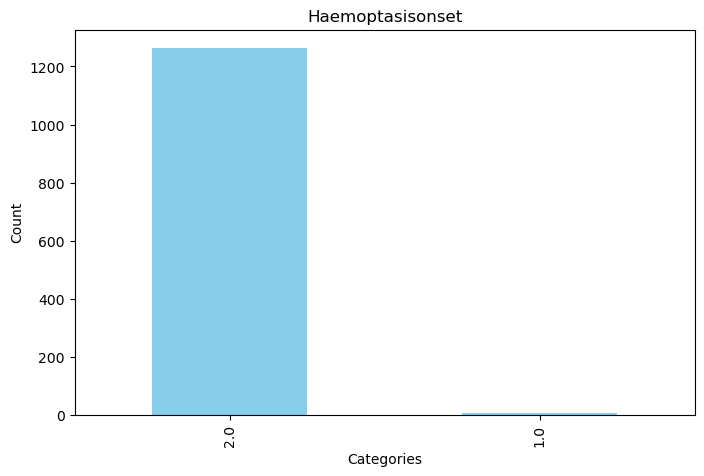

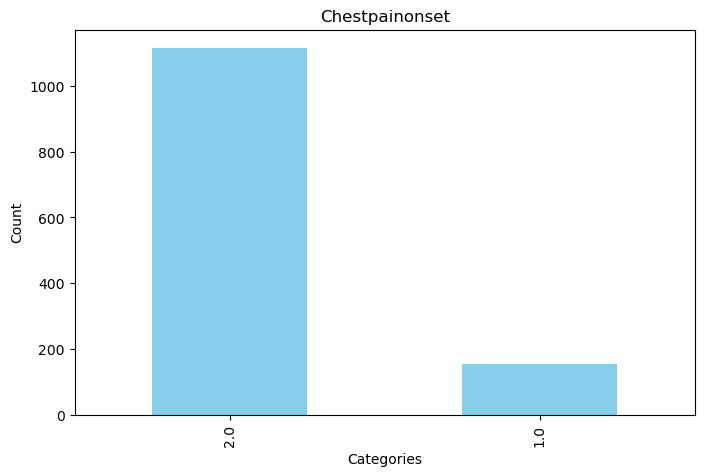

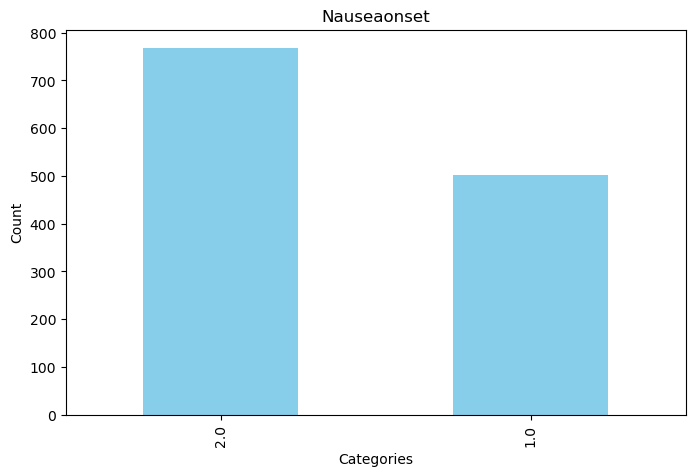

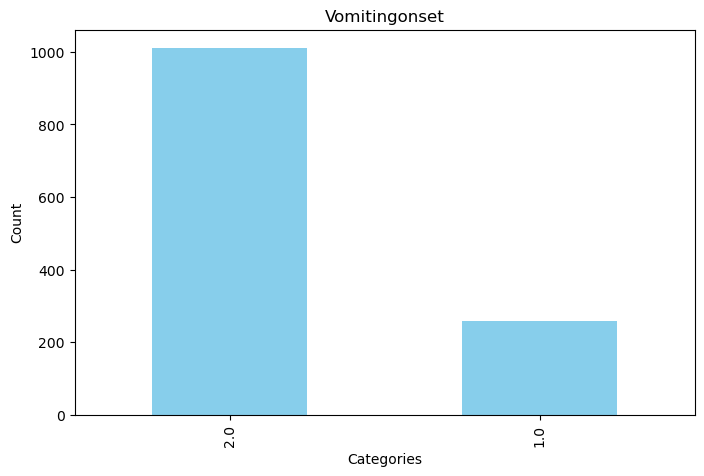

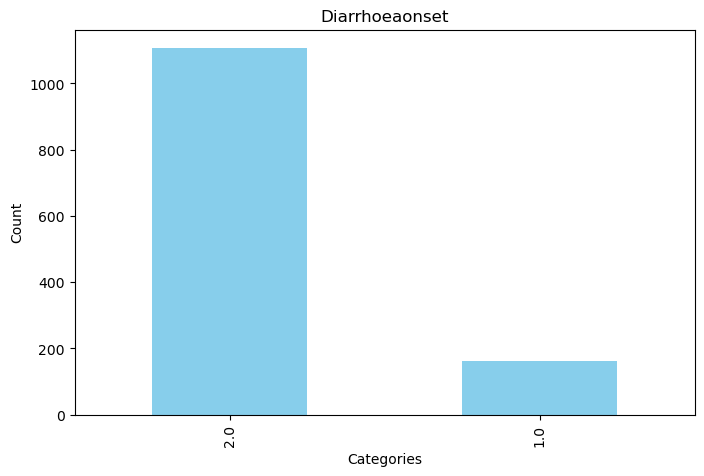

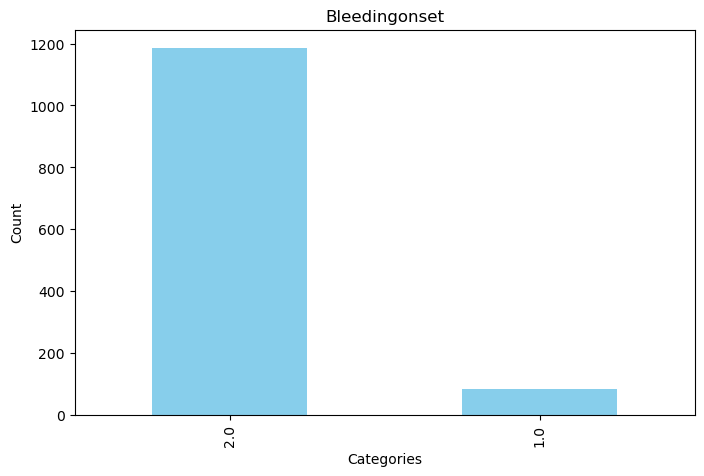

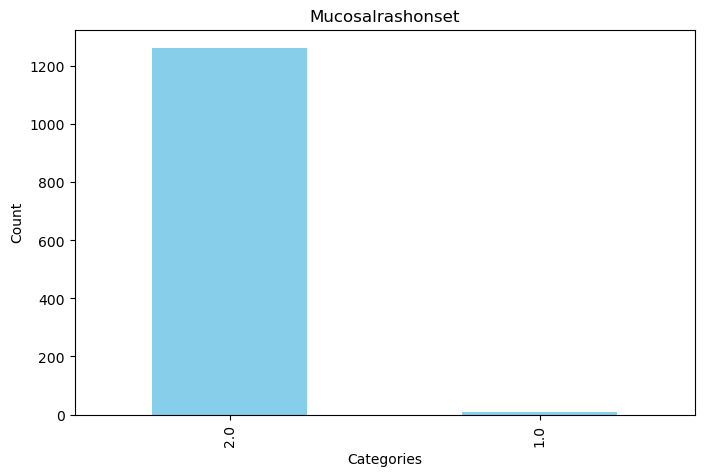

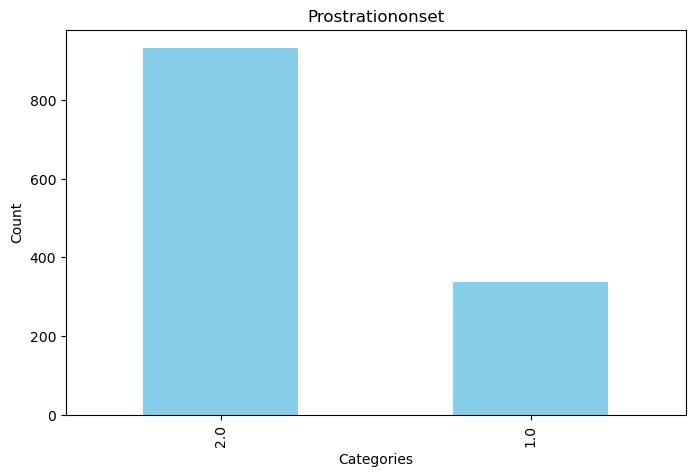

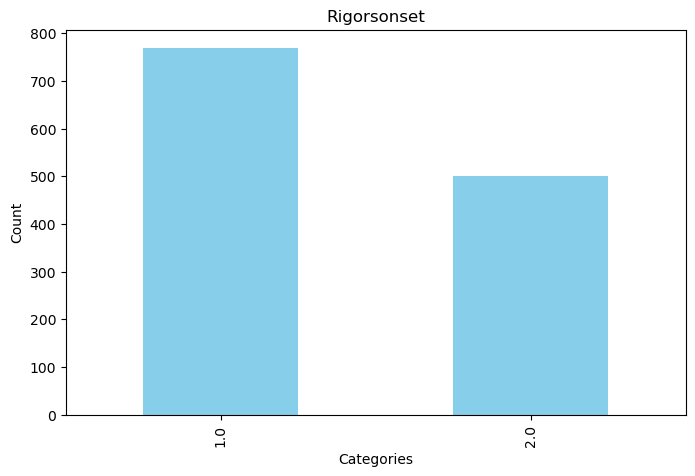

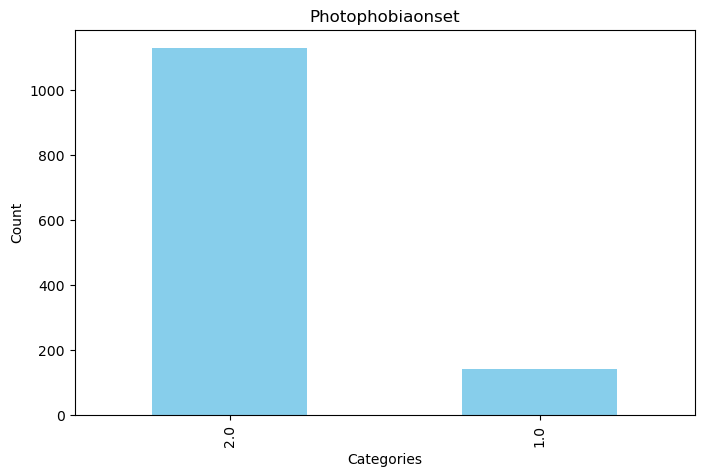

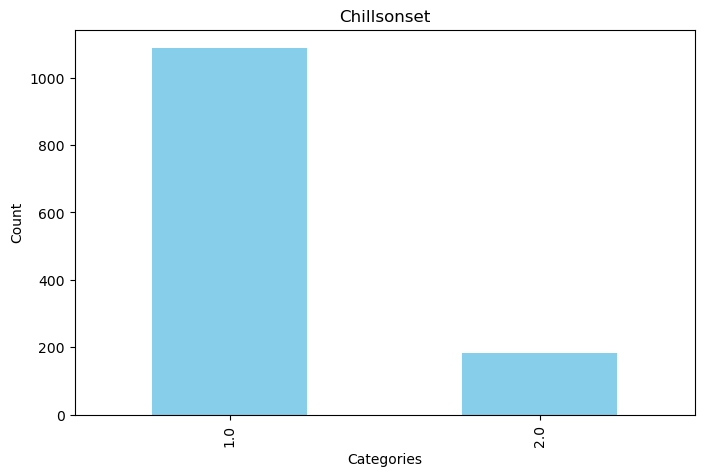

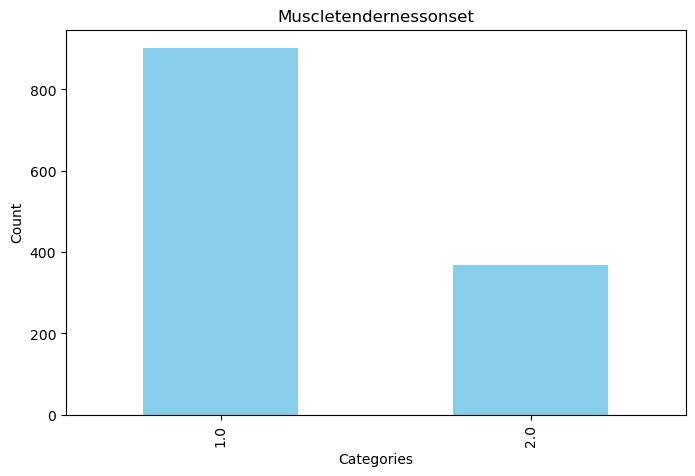

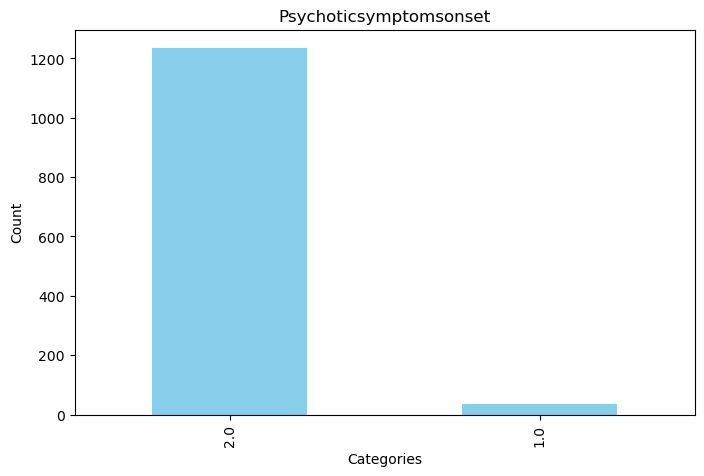

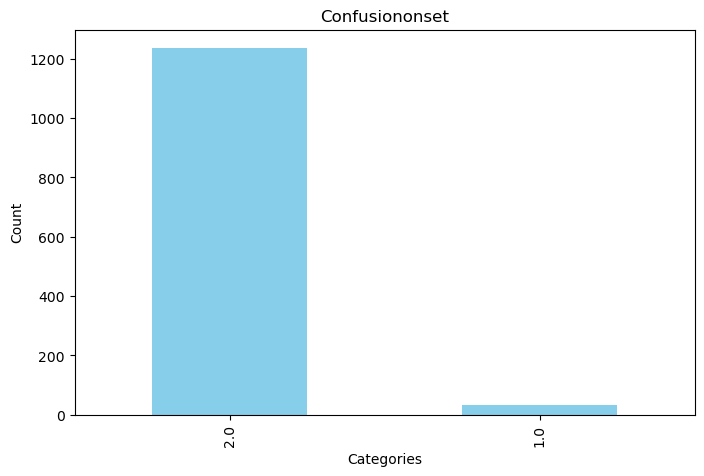

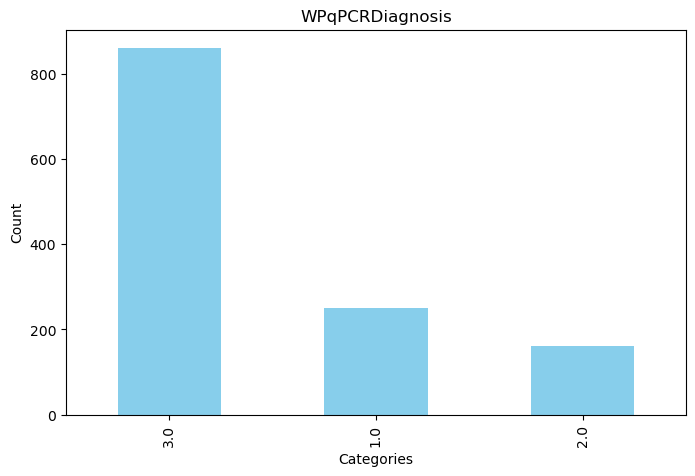

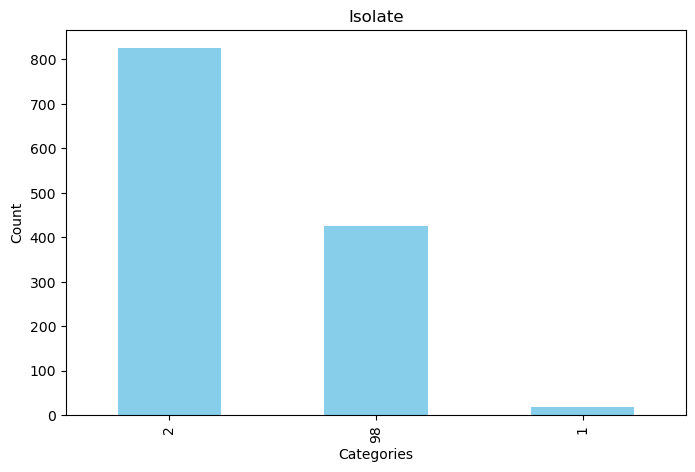

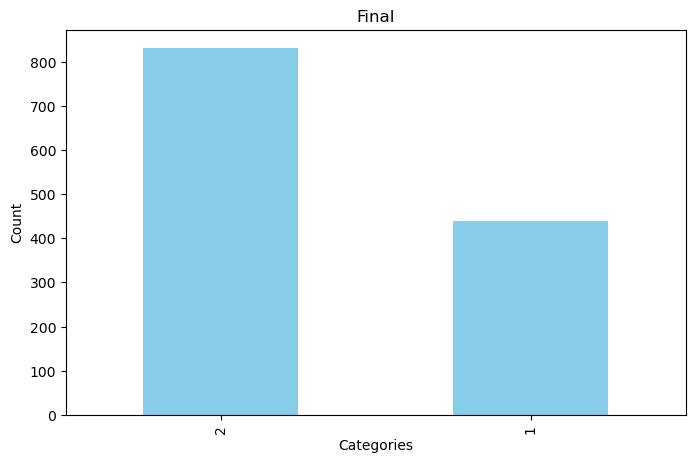

In [27]:
# Bar plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(col)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()

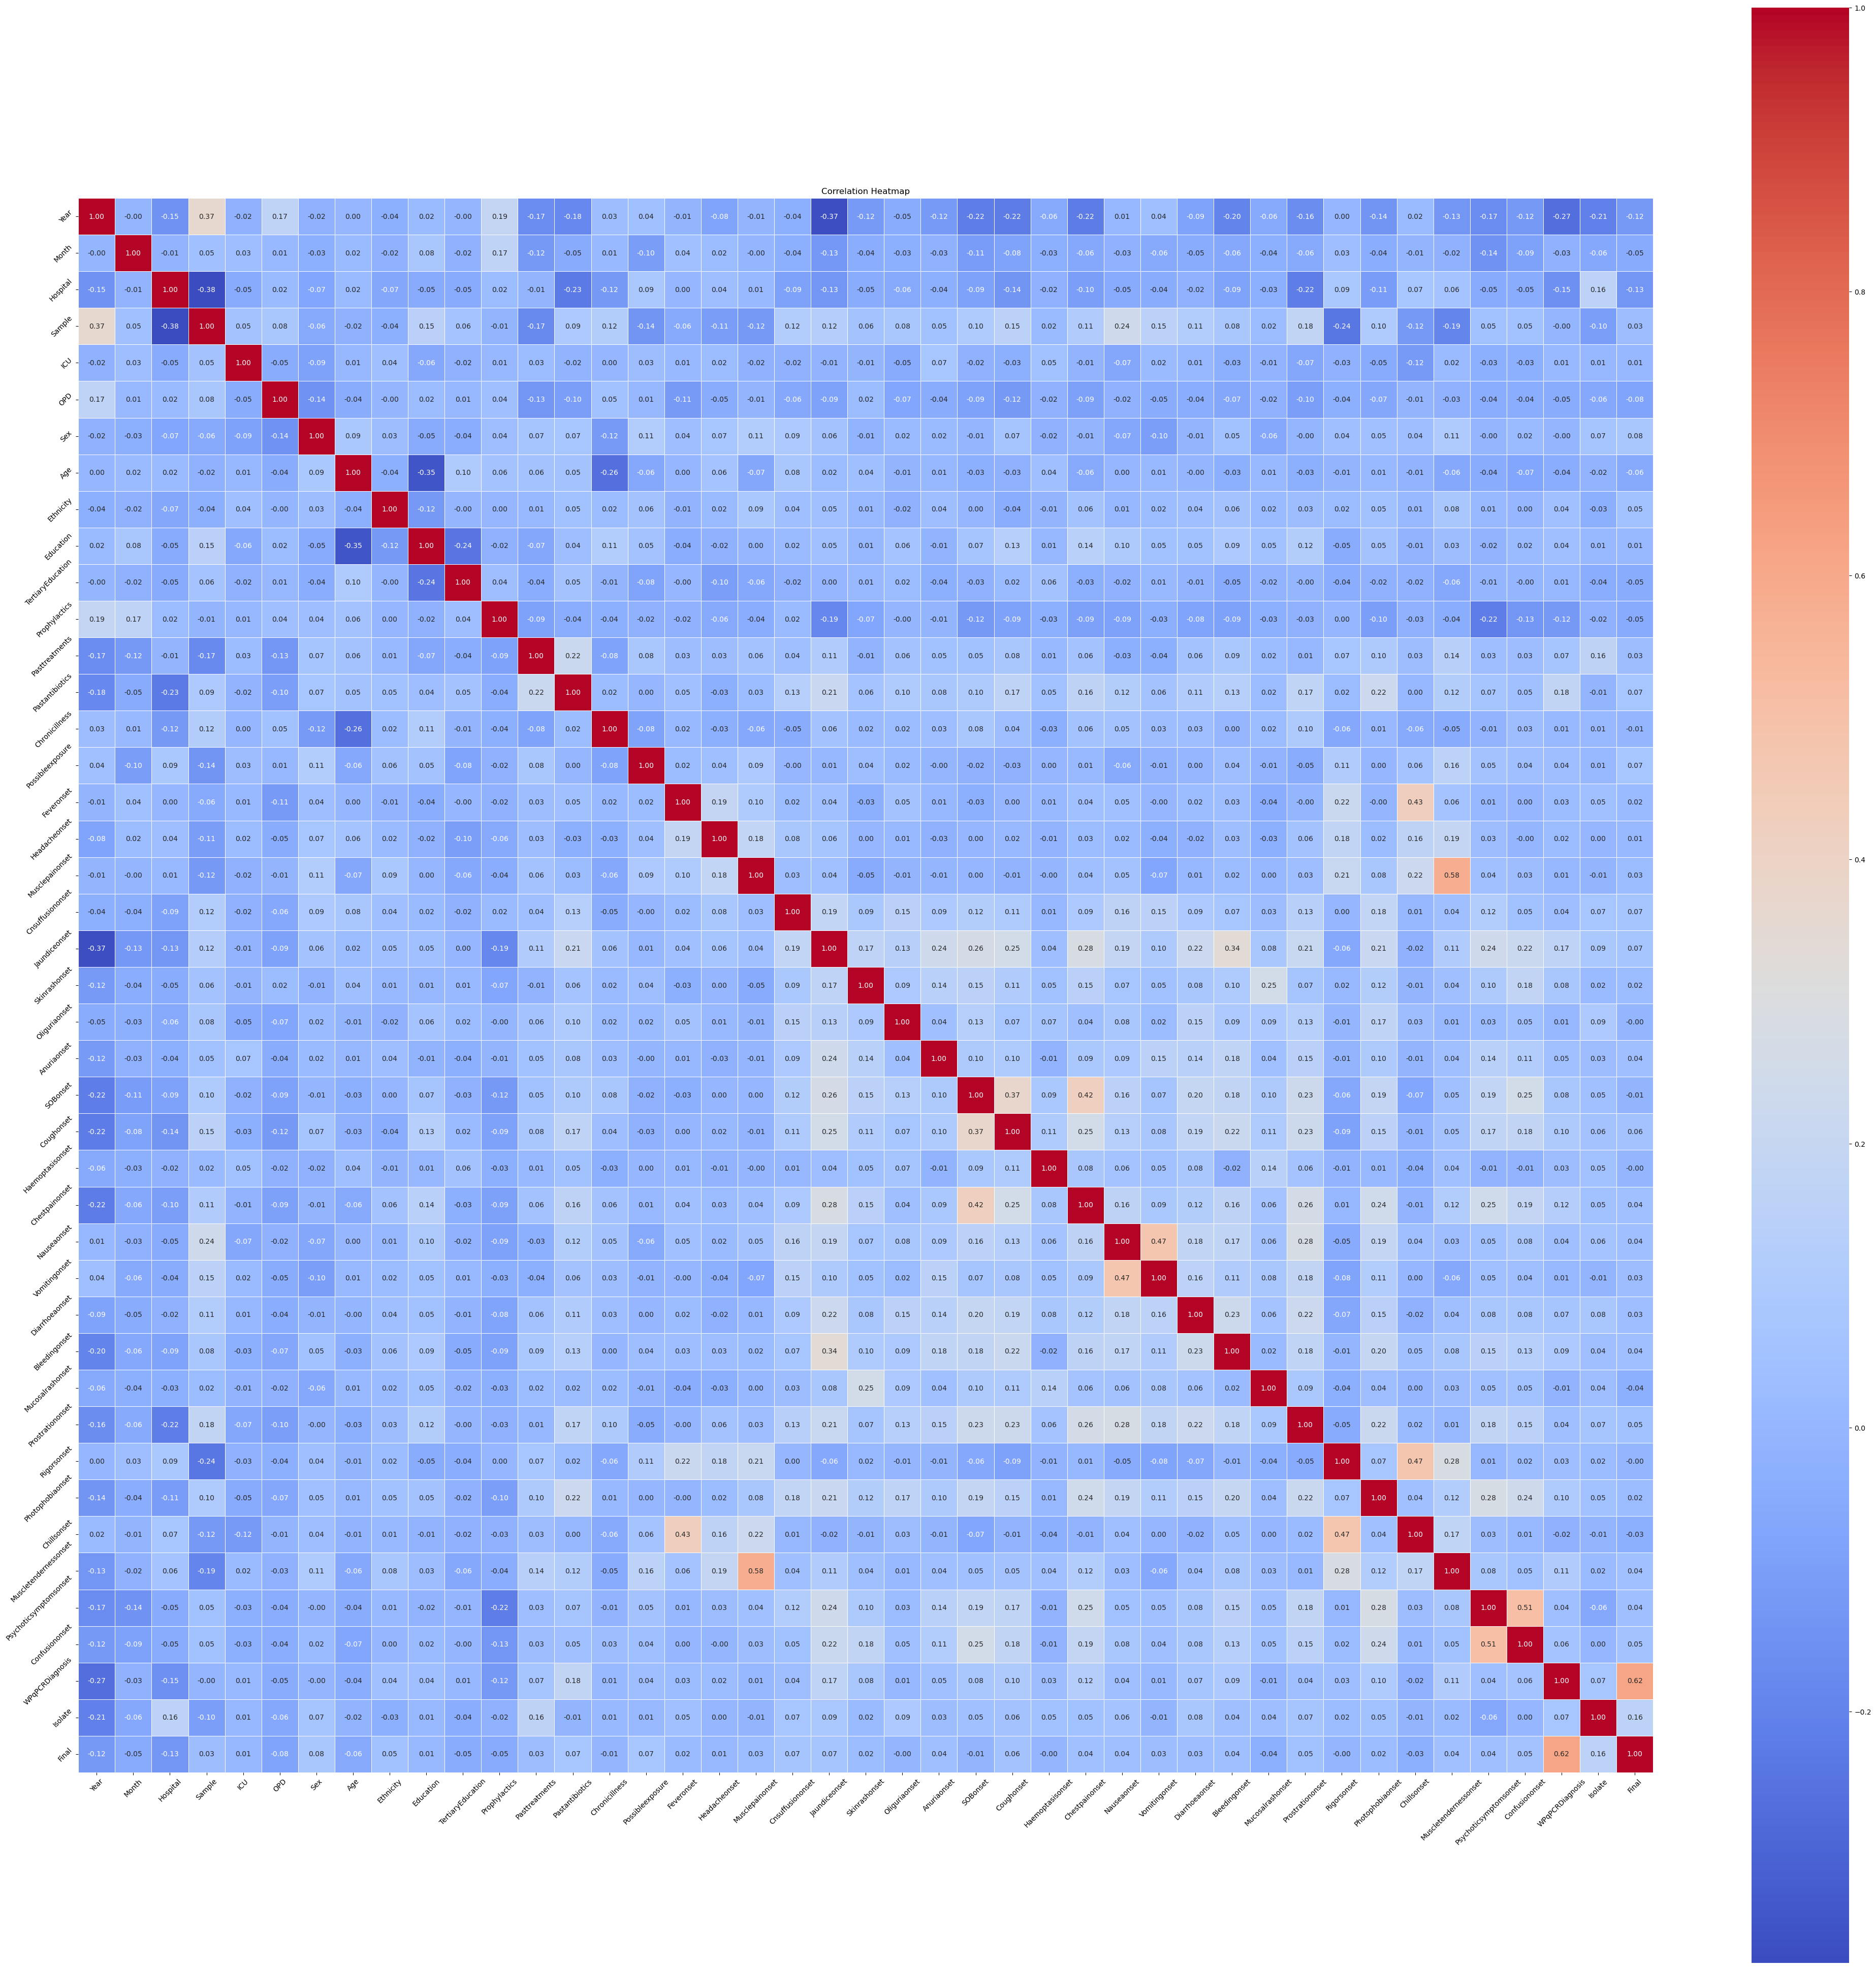

In [28]:
# Compute correlation matrix

#********************* Double Click on the Correlation Map to see Better Description *********************
corr_matrix = df.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title('Correlation Heatmap')
plt.show()

# b)

## <u> Fitting a Model </u>

In [29]:
#splitting into training and testing
X=df.drop('Final',axis=1)
y=df['Final']

In [30]:
cat_col_x = X.select_dtypes(include='category').columns.tolist()
num_col_x=  X.select_dtypes(include=['Int64', 'float64']).columns.tolist()

In [31]:
#transforming
transformer_num=Pipeline(steps=[('scaler',StandardScaler())])
transformer_cat=Pipeline(steps=[('encoder',OrdinalEncoder())])

In [32]:
#applying transformer to features
preprocessor=ColumnTransformer(transformers=[('numeric',transformer_num,num_col_x),('category',transformer_cat,cat_col_x)])

In [33]:
Logistic_Model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression(max_iter=2000))])

In [34]:
# Fit the model
Logistic_Model.fit(X, y)

# Evaluate the model
accuracy = Logistic_Model.score(X, y)
print("Accuracy:", accuracy)

Accuracy: 0.8307086614173228


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1386
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Year                    1270 non-null   category
 1   Month                   1270 non-null   category
 2   Hospital                1270 non-null   category
 3   Sample                  1270 non-null   category
 4   ICU                     1270 non-null   category
 5   OPD                     1270 non-null   category
 6   Sex                     1270 non-null   category
 7   Age                     1270 non-null   float64 
 8   Ethnicity               1270 non-null   category
 9   Education               1270 non-null   category
 10  TertiaryEducation       1270 non-null   category
 11  Prophylactics           1270 non-null   category
 12  Pasttreatments          1270 non-null   category
 13  Pastantibiotics         1270 non-null   category
 14  Chronicillness          1270 

In [36]:
print(df.isnull().sum().sum())

0


# c)

## <u> Data preprocessing for test dataset </u>

## Loading a Test Data Set

In [37]:
df_test = pd.read_csv('test.csv',engine='python')
df_test.head()

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarIcterohaemorrhagiaestr.RGA,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc
0,1,2017,6,1,1,2,2,1,49,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017,6,1,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2017,6,1,1,2,2,1,51,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2017,6,1,1,2,2,2,37,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2017,6,1,1,2,1,1,99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling missing values in test dataset

In [38]:
df1 = df_test.drop('ID', axis=1)

In [39]:
df1.replace(['99', 99], np.nan, inplace=True)

In [40]:
df1.isna().sum() 

Year                                             0
Month                                            0
Hospital                                         0
Sample                                           0
ICU                                             19
                                              ... 
FU_L.interrogansserovarAlexistr.616            317
FU_L.interrogansserovarAustralisstr.Ballico    317
FU_L.interrogansserovarwolfiistr.3705          317
FU_L.interrogansserovarWeerasinghe             317
FU_Patoc                                       317
Length: 804, dtype: int64

In [41]:
missing_percentage1 = df1.isnull().mean() * 100
print(missing_percentage1)

Year                                            0.000000
Month                                           0.000000
Hospital                                        0.000000
Sample                                          0.000000
ICU                                             5.475504
                                                 ...    
FU_L.interrogansserovarAlexistr.616            91.354467
FU_L.interrogansserovarAustralisstr.Ballico    91.354467
FU_L.interrogansserovarwolfiistr.3705          91.354467
FU_L.interrogansserovarWeerasinghe             91.354467
FU_Patoc                                       91.354467
Length: 804, dtype: float64


In [42]:
print(missing_percentage1[missing_percentage1 > 30])

Income                                         33.429395
Usualdrinkingwatersource                       73.775216
Usualbathingwatersource                        73.775216
Sourceofwaterforhousehold                      73.775216
Garbagedisposalprocedure                       73.775216
                                                 ...    
FU_L.interrogansserovarAlexistr.616            91.354467
FU_L.interrogansserovarAustralisstr.Ballico    91.354467
FU_L.interrogansserovarwolfiistr.3705          91.354467
FU_L.interrogansserovarWeerasinghe             91.354467
FU_Patoc                                       91.354467
Length: 733, dtype: float64


In [43]:
threshold = 30

In [44]:
cols_to_drop1 = missing_percentage1[missing_percentage1 > threshold].index

In [45]:
df1 = df1.drop(columns=cols_to_drop1)

In [46]:
# print(f"Dropped columns: {cols_to_drop1.tolist()}")

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    347 non-null    int64  
 1   Month                   347 non-null    int64  
 2   Hospital                347 non-null    int64  
 3   Sample                  347 non-null    int64  
 4   ICU                     328 non-null    float64
 5   OPD                     328 non-null    float64
 6   Sex                     312 non-null    float64
 7   Age                     304 non-null    float64
 8   Ethnicity               312 non-null    float64
 9   Education               257 non-null    float64
 10  TertiaryEducation       257 non-null    float64
 11  Prophylactics           269 non-null    float64
 12  Pasttreatments          272 non-null    float64
 13  Pastantibiotics         270 non-null    float64
 14  Chronicillness          268 non-null    fl

In [48]:
for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}")
    print("\n")

Column: Year
Unique values: [2017 2018 2019 2016]
Number of unique values: 4


Column: Month
Unique values: [ 6  7  8  9 10  3  5 11 12  2  4  1]
Number of unique values: 12


Column: Hospital
Unique values: [1 2 3 4 5 6 7 8]
Number of unique values: 8


Column: Sample
Unique values: [1 2]
Number of unique values: 2


Column: ICU
Unique values: [ 2. nan  1.]
Number of unique values: 3


Column: OPD
Unique values: [ 2.  1. nan]
Number of unique values: 3


Column: Sex
Unique values: [ 1.  2. nan]
Number of unique values: 3


Column: Age
Unique values: [49. 47. 51. 37. nan 70. 29. 42. 30. 34. 65. 38. 17. 15. 18. 57. 43. 36.
 52. 69. 67. 62. 50. 48. 28. 45. 41. 24. 33. 56. 40. 44. 76. 55. 68.  9.
 61. 32. 59. 58. 25. 22. 54. 60. 39. 64. 35. 46. 20. 19. 72.  2. 53.  7.
 26. 31. 21. 63. 66. 13. 71. 16. 79. 27. 77.]
Number of unique values: 65


Column: Ethnicity
Unique values: [ 1. nan  3.  2.]
Number of unique values: 4


Column: Education
Unique values: [ 5. 10. 11. nan 12.  8.  9.  6.  0

In [49]:
numerical_columns1 = ['Age']
categorical_columns1 = [col for col in df1.columns if col not in numerical_columns1]
categorical_columns1

['Year',
 'Month',
 'Hospital',
 'Sample',
 'ICU',
 'OPD',
 'Sex',
 'Ethnicity',
 'Education',
 'TertiaryEducation',
 'Prophylactics',
 'Pasttreatments',
 'Pastantibiotics',
 'Chronicillness',
 'Possibleexposure',
 'Feveronset',
 'Headacheonset',
 'Musclepainonset',
 'Cnsuffusiononset',
 'Jaundiceonset',
 'Skinrashonset',
 'Oliguriaonset',
 'Anuriaonset',
 'SOBonset',
 'Coughonset',
 'Haemoptasisonset',
 'Chestpainonset',
 'Nauseaonset',
 'Vomitingonset',
 'Diarrhoeaonset',
 'Bleedingonset',
 'Mucosalrashonset',
 'Prostrationonset',
 'Rigorsonset',
 'Photophobiaonset',
 'Chillsonset',
 'Muscletendernessonset',
 'Psychoticsymptomsonset',
 'Confusiononset',
 'Feverad',
 'Headachead',
 'Chillsad',
 'Rigorsad',
 'Musclepainad',
 'Muscletendernessad',
 'Nauseaad',
 'Vomitingadmission',
 'Cnsuffusionad',
 'Skinrashad',
 'Mucosalrashad',
 'Prostrationad',
 'Diarrhoeaad',
 'OliguriaAd',
 'Anuriaad',
 'Jaundicead',
 'Hepatictendernessad',
 'Hepatomegalyad',
 'Spleenimegalyad',
 'Lympadenopathya

In [50]:
for col in categorical_columns1:
    df1[col] = df1[col].astype('category')

In [51]:
for col in categorical_columns1:
    df1[col].fillna(df1[col].mode()[0], inplace=True)

In [52]:
for col in numerical_columns1:
    df1[col].fillna(df1[col].mean(), inplace=True)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Year                    347 non-null    category
 1   Month                   347 non-null    category
 2   Hospital                347 non-null    category
 3   Sample                  347 non-null    category
 4   ICU                     347 non-null    category
 5   OPD                     347 non-null    category
 6   Sex                     347 non-null    category
 7   Age                     347 non-null    float64 
 8   Ethnicity               347 non-null    category
 9   Education               347 non-null    category
 10  TertiaryEducation       347 non-null    category
 11  Prophylactics           347 non-null    category
 12  Pasttreatments          347 non-null    category
 13  Pastantibiotics         347 non-null    category
 14  Chronicillness          34

## <u> Predictions the Model </u>

In [54]:
X_test=df1

In [55]:
predictions = Logistic_Model.predict(X_test)
print(predictions)

[2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2
 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1
 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1
 2 2 2 2 1 1 1 1 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 1 2 1 1 2 1 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 1 2 1 1 1 2 1 1 1 1
 2 1 2 2 1 1 1 2 2 2 2 2 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 1]


In [56]:
predictions_df = pd.DataFrame({
    'ID': df_test['ID'],  # Use the IDs corresponding to non-duplicates
    'Final': predictions
})

In [57]:
predictions_df.to_csv("D:\\4th Year 1st Sem\\4rth year  - 1st sem\\ST 4035 - Data Science\\Assignment 1\\st40352023\\sample_submission.csv",index=False)